In [1]:
import pandas as pd

In [2]:
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
cols = []
for x in customer_df.columns:
    x = x.replace( ' ' , '_').lower()
    cols.append(x)
customer_df.columns = cols

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
customer_df = customer_df.rename(columns = {'employmentstatus' : 'employment_status'})

In [10]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [11]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date, errors='coerce')

In [12]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

Check NaN values per column

In [13]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [14]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [15]:
num = customer_df.select_dtypes(np.number)

In [16]:
for i in customer_df:
    print (len(customer_df[i].value_counts()), '----', i)


9134 ---- customer
5 ---- state
8041 ---- customer_lifetime_value
2 ---- response
3 ---- coverage
5 ---- education
59 ---- effective_to_date
5 ---- employment_status
2 ---- gender
5694 ---- income
3 ---- location_code
3 ---- marital_status
202 ---- monthly_premium_auto
36 ---- months_since_last_claim
100 ---- months_since_policy_inception
6 ---- number_of_open_complaints
9 ---- number_of_policies
3 ---- policy_type
9 ---- policy
4 ---- renew_offer_type
4 ---- sales_channel
5106 ---- total_claim_amount
6 ---- vehicle_class
3 ---- vehicle_size


In [17]:
#condition
def identify_data(x):
    # identify empty dataframe
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    categoricals = pd.DataFrame()
    cols=x.columns
    for i in cols: 
        if x[i].dtypes in ['int64','float64']:
            if len(x[i].value_counts()) > 202:
                #print(i)
                continuous_df[i] = x[i]
            else:
                #print(i)
                discrete_df[i] = x[i]
        elif customer_df[i].dtypes == 'object':
            #print(i)
            categoricals[i] = x[i]
    return continuous_df, discrete_df, categoricals

In [18]:
continuous_df, discrete_df, categoricals=identify_data(customer_df)

In [19]:
continuous_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   int64  
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 214.2 KB


In [20]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [21]:
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [22]:
categoricals.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [23]:
customer_df = customer_df.drop(['customer'], axis= 1)

In [24]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [25]:
categoricals = customer_df.select_dtypes(np.object)

In [26]:
categoricals

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Check values of categoricals

Plot a correlation matrix, what can you see?
Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
What can you see in the plots?
Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
Have you found outliers? If you have, what should we do with them?
Check nan values per column.
Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer id column?

Plot a correlation matrix, what can you see? 

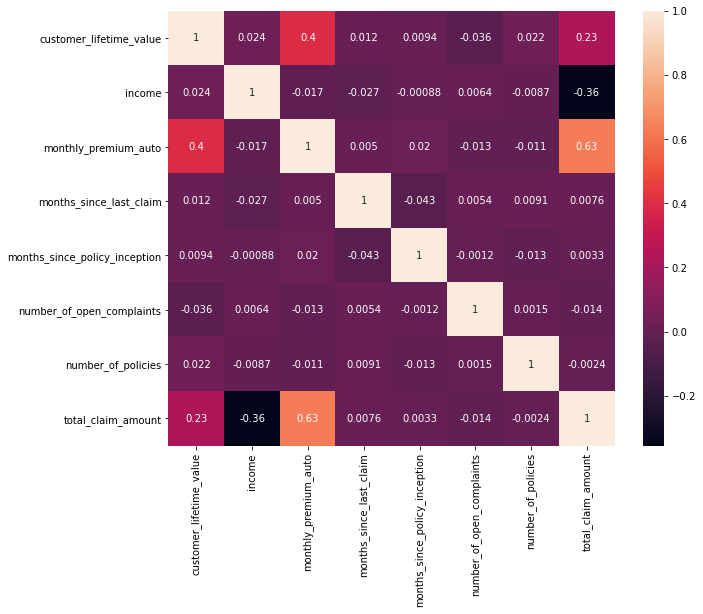

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_matrix=num.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


The independent variables have low colleration with dependent variable 'total_claim_amount', only variable 'month_premium_auto' has highest correlation coeffiecient of 0.63

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


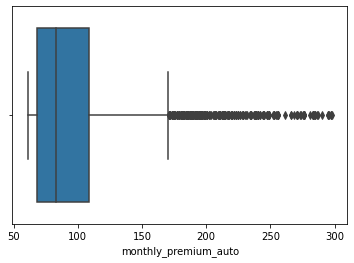

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


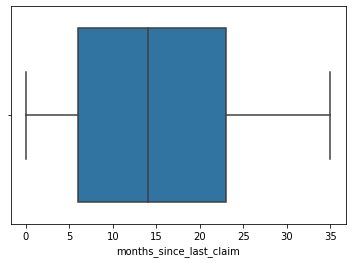

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


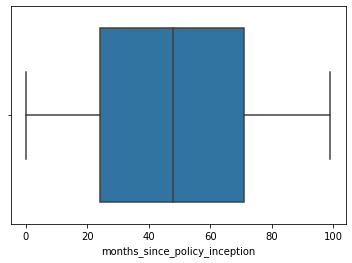

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


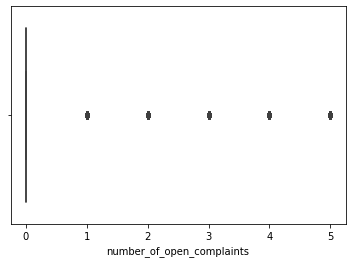

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


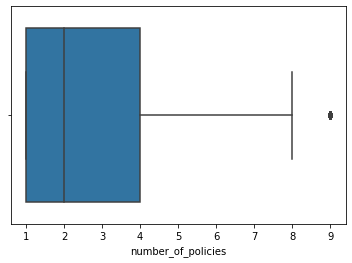

In [28]:
#Create a function to plot every discrete variables. 
import seaborn as sns
for i in discrete_df.columns:
    sns.boxplot(discrete_df[i])
    plt.show()

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


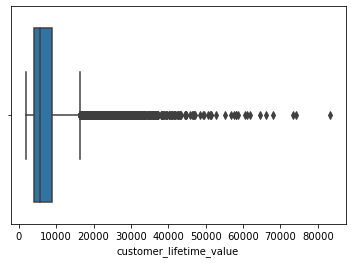

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


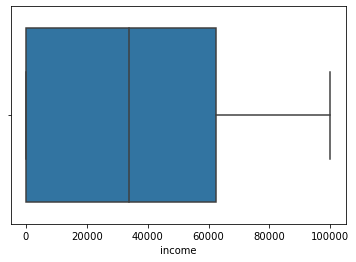

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


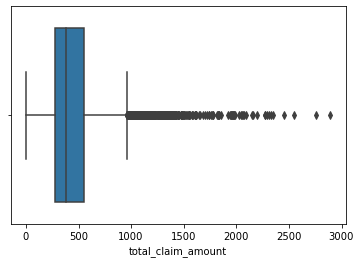

In [29]:
#Do the same with continuous variables
import seaborn as sns
for i in continuous_df.columns:
    sns.boxplot(continuous_df[i])
    plt.show()

continuous_df['customer_lifetime_value']: there are outliers where customer_df['customer_lifetime_value'] is greater than around 18,000
continuous_df['income']:  there are outliers where customer_df['income'] is greater than around 1,000

In [30]:
# dealing with outliers for 'customer_lifetime_value':
#iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
#upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr

In [31]:
#continuous_df = continuous_df[continuous_df['customer_lifetime_value']<upper_limit]
#sns.boxplot(continuous_df['customer_lifetime_value'])
#plt.show()

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?


So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```


In [32]:
# open the categoricals variable:
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


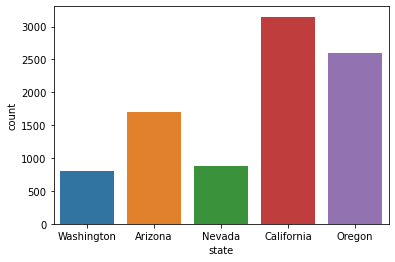

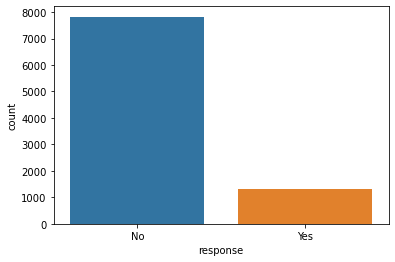

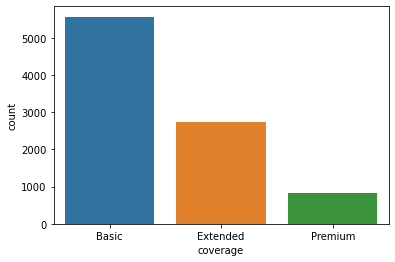

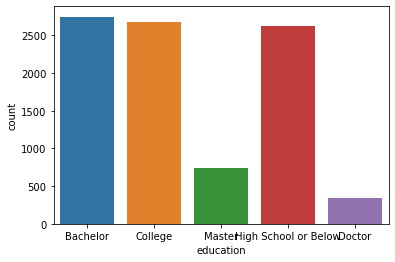

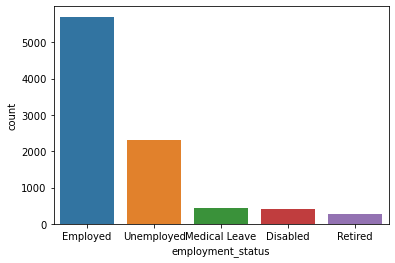

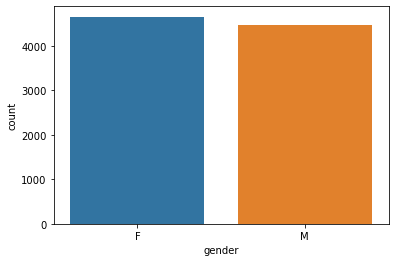

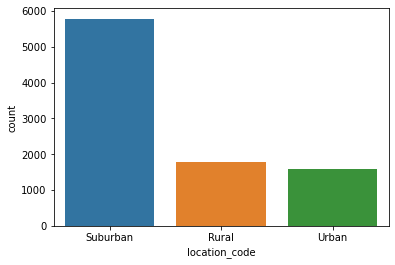

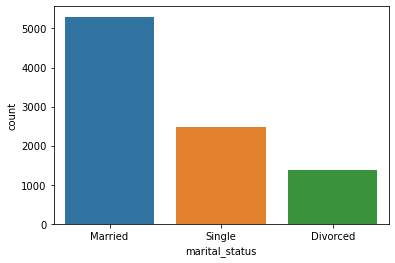

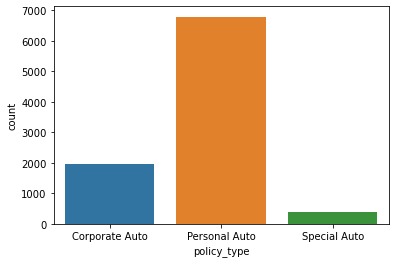

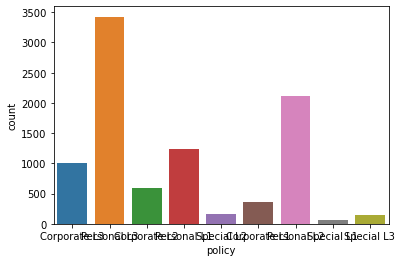

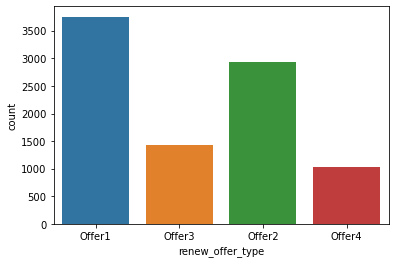

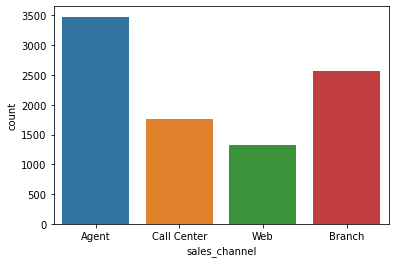

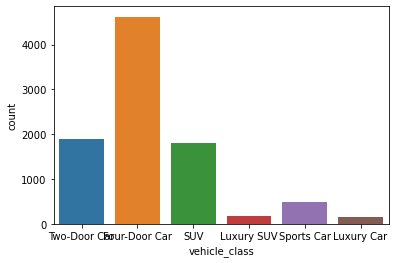

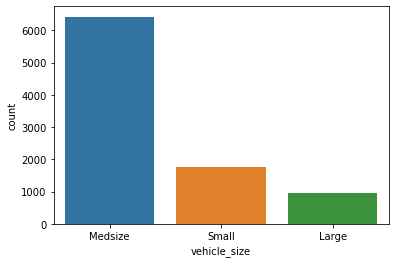

In [33]:
# Plot all the categorical variables with the proper plot. What can you see?
for i in categoricals.columns:
    sns.countplot(x=i, data=customer_df)
    plt.show()

In [34]:
categoricals.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

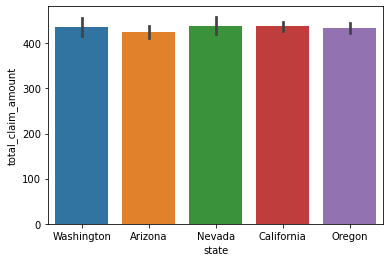

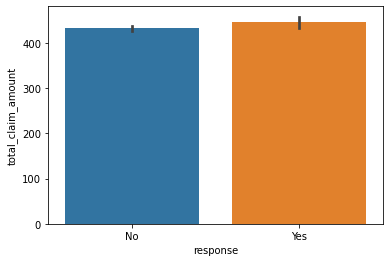

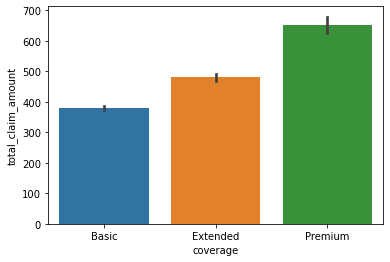

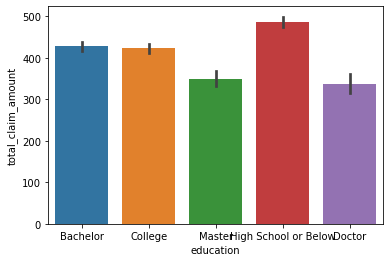

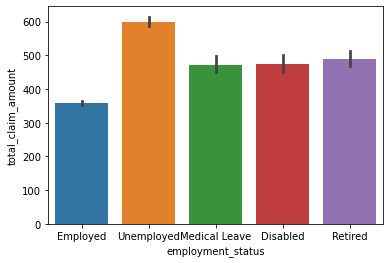

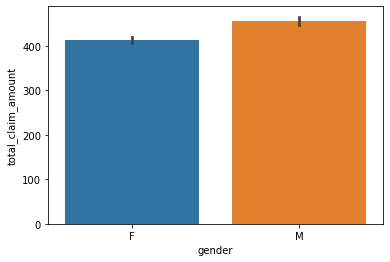

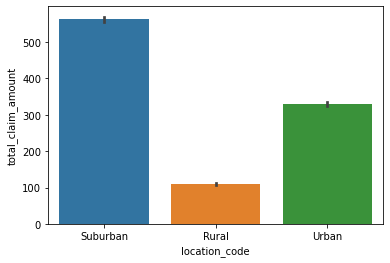

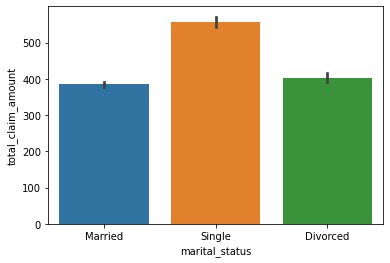

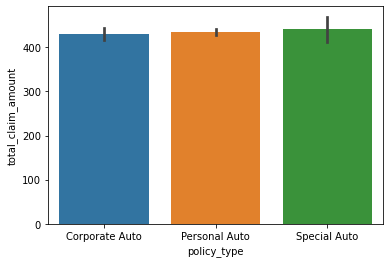

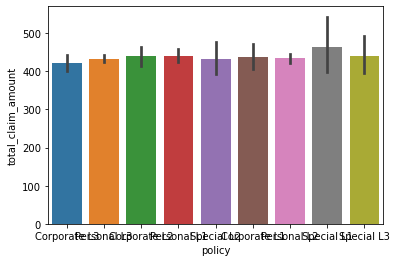

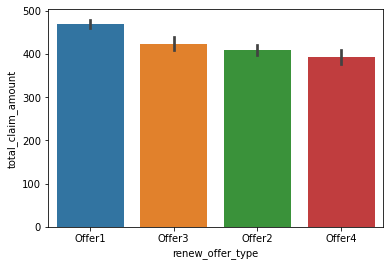

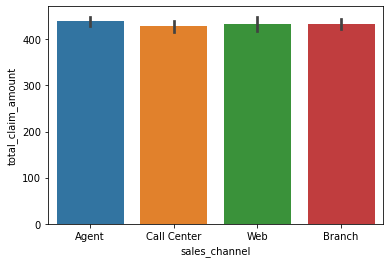

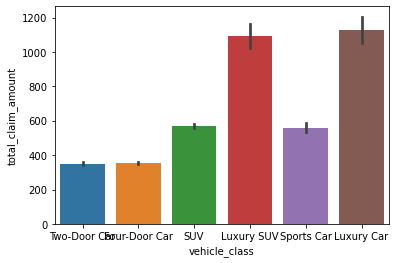

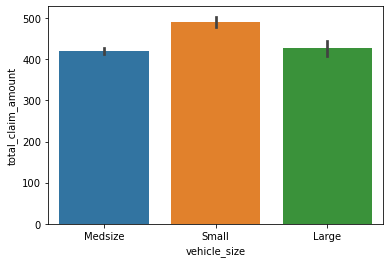

In [35]:
for i in categoricals.columns:
    sns.barplot(x=i , y= 'total_claim_amount', data=customer_df)
    plt.show()

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


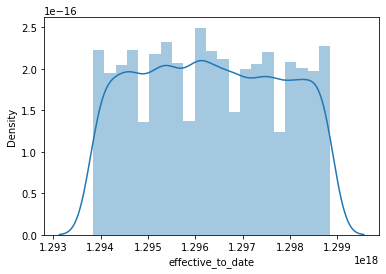

In [36]:
sns.distplot(customer_df['effective_to_date'])
plt.show()

In [37]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
Create a copy of the dataframe for the data wrangling.
Normalize the continuous variables. You can use any one method you want.
Encode the categorical variables
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [38]:
customer_copy = customer_df.copy()

In [39]:
#condition
def identify_data(x):
    # identify empty dataframe
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    categoricals = pd.DataFrame()
    cols=x.columns
    for i in cols: 
        if x[i].dtypes in ['int64','float64']:
            if len(x[i].value_counts()) > 202:
                #print(i)
                continuous_df[i] = x[i]
            else:
                #print(i)
                discrete_df[i] = x[i]
        elif customer_df[i].dtypes == 'object':
            #print(i)
            categoricals[i] = x[i]
    return continuous_df, discrete_df, categoricals

In [40]:
continuous_df, discrete_df, categoricals=identify_data(customer_copy)

(array([14975., 14982., 14989., 14996., 15006., 15013., 15020., 15027.,
        15034.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

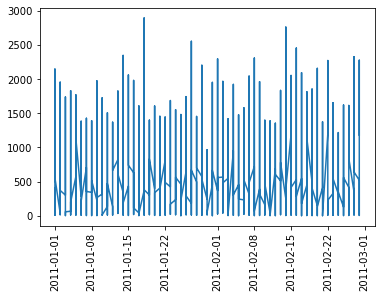

In [41]:
customer_df = customer_df.sort_values('effective_to_date', ascending=True)
plt.plot(customer_df['effective_to_date'], customer_df['total_claim_amount'])
plt.xticks(rotation='vertical')

In [42]:
customer_df['week'] = customer_df['effective_to_date'].apply(lambda x: x.week)


C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


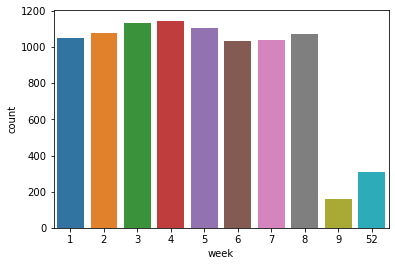

In [43]:
sns.countplot(customer_df['week'])
plt.show()

In [44]:
customer_df['day'] = customer_df['effective_to_date'].apply(lambda x: x.day)

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


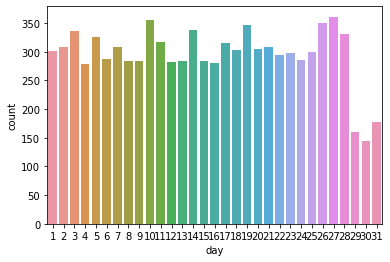

In [45]:
sns.countplot(customer_df['day'])
plt.show()

In [46]:
date_labels = list(range(1,31,1))
customer_df['day'] = pd.cut(customer_df['day'],30, labels=date_labels)

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


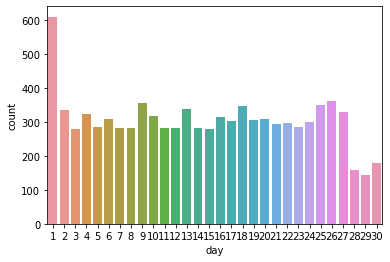

In [47]:
sns.countplot(customer_df['day'])
plt.show()

In [48]:
week_labels = list(range(1,5,1))
customer_df['week'] = pd.cut(customer_df['day'],4, labels=week_labels)

C:\Users\trang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


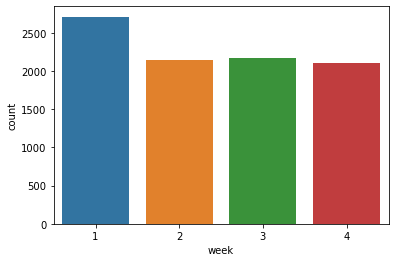

In [49]:
sns.countplot(customer_df['week'])
plt.show()

In [50]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


In [51]:
continuous_df['customer_lifetime_value']=continuous_df['customer_lifetime_value'].apply(log_transfom_clean_)

In [52]:
continuous_df['total_claim_amount']=continuous_df['total_claim_amount'].apply(log_transfom_clean_)

In [53]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,7.924260,56274,5.952753
1,8.850738,0,7.031268
2,9.464008,48767,6.339428
3,8.941920,0,6.272653
4,7.942253,43836,4.928202


In [54]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))


In [55]:
skew_df(continuous_df)

the skew of customer_lifetime_value is: 0.5759407149025203
the skew of income is: 0.28688727581189166
the skew of total_claim_amount is: -1.9200328840780618


Encode the categorical variables 

In [56]:
customer_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [57]:
#dropping because of huge imbalnce: state, response, employment_status,  
#to ordinals: covarge, education, renewm_offer_ytpe, vahicle_class (group), vehicle_size
#drop policy, sale_channel because of reduant info


In [58]:
customer_copy = customer_copy.drop(columns = ['response','policy'], axis= 1)

In [59]:
customer_copy.head()

,state,customer_lifetime_value,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [60]:
#to ordinals: covarge, employment_status, location_code, educationvehicle_size

In [61]:
categoricals.employment_status.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [62]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
categoricals['coverage'] = categoricals['coverage'].map(coverage_dict)
education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
categoricals['education'] = categoricals['education'].map(education_dict)
employment_status_dict = {'Employed': 0, 'Unemployed':1, 'Medical Leave':1,'Disabled':1,'Retired':1}
categoricals['employment_status'] = categoricals['employment_status'].map(employment_status_dict)
location_code_dict = {'Suburban':0, 'Rural':1, 'Urban':2}
categoricals['location_code'] = categoricals['location_code'].map(location_code_dict)
vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
categoricals['vehicle_size'] = categoricals['vehicle_size'].map(vehicle_dict)
categoricals.head()


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,2,0,F,0,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1
1,Arizona,No,1,2,1,F,0,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,1
2,Nevada,No,2,2,0,F,0,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1
3,California,No,0,2,1,M,0,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1
4,Washington,No,0,2,0,M,1,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1


In [63]:
categoricals=pd.get_dummies(categoricals, columns = ['state','gender', 'location_code', 'response','marital_status', 'policy_type','policy', 'renew_offer_type','vehicle_class','sales_channel'], drop_first=True)
categoricals.head()



,coverage,education,employment_status,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,location_code_1,location_code_2,response_Yes,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,2,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,2,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
categoricals.head()

,coverage,education,employment_status,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,location_code_1,location_code_2,response_Yes,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,2,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,2,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [65]:
full = pd.concat([continuous_df, discrete_df, categoricals], axis = 1 )

In [66]:
full.head()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employment_status,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,location_code_1,location_code_2,response_Yes,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,7.924260,56274,5.952753,69,32,5,0,1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8.850738,0,7.031268,94,13,42,0,8,1,2,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,9.464008,48767,6.339428,108,18,38,0,2,2,2,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.941920,0,6.272653,106,18,65,0,7,0,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,7.942253,43836,4.928202,73,12,44,0,1,0,2,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code

In [103]:
def training_model(df, target , mode, k = None , test_size = 0.3):
    y = df[target]
    X = df.drop(target,axis=1)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)
    if mode == 'Linear':
        from sklearn import linear_model
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions  = pd.DataFrame(lm.predict(X_test), columns=[y.name])
        
    elif mode == 'Logistic':
        from sklearn.preprocessing import StandardScaler
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import cohen_kappa_score
        classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)
        predictions = pd.DataFrame(classification.predict(X_test),columns=[y.name])
        classification.score(X_test, y_test)
        print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,classification.predict(X)))
        
    elif mode =='K-NN':
        from sklearn.neighbors import KNeighborsRegressor
        knn_model = KNeighborsRegressor(n_neighbors=4,p=2) # The keyword "n_neighbors" is what sets the K.
        knn_model.fit(X_train, y_train)
        predictions = pd.DataFrame(knn_model.predict(X_test), columns=[y.name])
    else: print('Something is wrong')
        
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    list_of_error_metrics = [MAE,MSE,RMSE,R2]
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    N = len(X_test)
    p = X_test.shape[1]
    ADJ_R2 = 1-((1-r2)*(N-1)/(N-p-1))
    print("The R_adj^{2} value on the TEST set is: ",round(ADJ_R2,2))  
    return predictions, list_of_error_metrics


In [104]:
 predictions_linear, list_of_error_metrics = training_model(full,'total_claim_amount', 'Linear',  test_size = 0.3)

The mean absolute error of the model in the test set is:   0.28
The mean squared error of the model in the test set is:   0.23
The root mean squared error of the model in the test set is:   0.48
The R2 of the model in the test set is: 0.74
The R_adj^{2} value on the TEST set is:  0.73


In [105]:
 predictions_linear, list_of_error_metrics = training_model(full,'employment_status', 'Logistic',  test_size = 0.3)

The accuracy of the model in the TEST set is:  0.94
The kappa of the model is:  0.8529679508109895
The mean absolute error of the model in the test set is:   0.06
The mean squared error of the model in the test set is:   0.06
The root mean squared error of the model in the test set is:   0.25
The R2 of the model in the test set is: 0.72
The R_adj^{2} value on the TEST set is:  0.73


C:\Users\trang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
 predictions_linear, list_of_error_metrics = training_model(full,'total_claim_amount', 'K-NN',  test_size = 0.3)

The mean absolute error of the model in the test set is:   0.58
The mean squared error of the model in the test set is:   0.80
The root mean squared error of the model in the test set is:   0.90
The R2 of the model in the test set is: 0.09
The R_adj^{2} value on the TEST set is:  0.73


In [112]:
#You can check also the MLPRegressor for this task
y1 = full['total_claim_amount']
X1 = full.drop('total_claim_amount',axis = 1)
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X1, y1 = make_regression(n_samples=200, random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train1, y_train1)
regr.predict(X_test1[:2])
regr.score(X_test1, y_test1)

C:\Users\trang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076593